## Exploratory data analysis of the US Stock Financial indicators data set

#### Names of contributors: Anene Ifeanyi, Chizitere Igwe

#### Date: 2020-12-24

# Table of contents

1. [Dataset Summary](#DatasetSummary)
2. [Problem Statement](#ProblemStatement)
3. [Housekeeping](#Housekeeping)
4. [Partition Data into train and test splits](#PartitionDataintotrainandtestsplits)
5. [Exploratory Data Visualisations](#ExploratoryDataVisualisations)
6. [References](#References)

### Dataset Summary <a name="DatasetSummary"></a>

The data used in this project consists of 5 data sets:

- `2014_Financial_Data.csv`
- `2015_Financial_Data.csv`
- `2016_Financial_Data.csv`
- `2017_Financial_Data.csv`
- `2018_Financial_Data.csv`

The datasets were created by `Nicolas Carbone`. The datasets were sourced from kaggle's 200+ Financial Indicators of US stocks (2014-2018), and it can be found [here](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018), particularly this [file](https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018/download).

Each dataset contains 200+ financial indicators, which are usually found in 10-K filings of publicly traded company yearly releases. There are some missing values in this dataset. Each row in each dataset represents a set of observations of different companies and each column represents a feature of the stock's future performance. These datasets can be used for a classification task, whereby if the value of the `PRICE VAR [%]` column is positive, the last column `class` = 1, which signifies that a hypothetical investor should BUY the stock at the start of the year and sell at the end of the year for a profit. Whilst, if the value of the `PRICE VAR [%]` column is negative, the column `class` = 0, which signifies that a hypothetical investor should NOT BUY the stock because its value will decrease by the end of the year. 

The datasets can also be used for a regression task, whereby the target column is the `PRICE VAR [%]` column.


### Problem Statement <a name="ProblemStatement"></a>

Given the financial stock indicators, should a hypothetical investor buy the stock or not? 

In [1]:
# Import required exploratory data analysis packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# train test split and cross validation
from sklearn.model_selection import train_test_split

In [2]:
# For this exploratory data analysis, we will only be working with the 2014 dataset. The techniques applied here can be applied to the other datasets.

df_2014 = pd.read_csv('data/raw/2014_Financial_Data.csv') # Home directory is working directory

### Housekeeping <a name="Housekeeping"></a>


In [3]:
# Rename Unnamed:0 column to Ticker

df_2014 = df_2014.rename(columns={'Unnamed: 0': 'Ticker'})

In [4]:
df_2014.head()

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2015 PRICE VAR [%],Class
0,PG,7.440100e+10,-0.0713,3.903000e+10,3.537100e+10,0.000000e+00,2.146100e+10,2.146100e+10,1.391000e+10,7.090000e+08,...,-0.0187,-0.0217,0.0359,0.0316,0.1228,0.0000,-0.1746,Consumer Defensive,-9.323276,0
1,VIPS,3.734148e+09,1.1737,2.805625e+09,9.285226e+08,1.083303e+08,3.441414e+08,7.939267e+08,1.345959e+08,1.214869e+07,...,NaN,NaN,NaN,NaN,NaN,1.6484,1.7313,Consumer Defensive,-25.512193,0
2,KR,9.837500e+10,0.0182,7.813800e+10,2.023700e+10,0.000000e+00,1.519600e+10,1.751200e+10,2.725000e+09,4.430000e+08,...,0.0618,0.0981,0.1886,0.3268,0.2738,0.0000,0.0234,Consumer Defensive,33.118297,1
3,RAD,2.552641e+10,0.0053,1.820268e+10,7.323734e+09,0.000000e+00,6.561162e+09,6.586482e+09,7.372520e+08,4.245910e+08,...,0.0211,-0.0510,-0.0189,0.1963,-0.0458,0.0000,-0.0060,Consumer Defensive,2.752291,1
4,GIS,1.790960e+10,0.0076,1.153980e+10,6.369800e+09,0.000000e+00,3.474300e+09,3.412400e+09,2.957400e+09,3.024000e+08,...,0.0257,0.0090,0.0215,0.0274,0.1025,0.0000,-0.0220,Consumer Defensive,12.897715,1


In [5]:
total_observations = len(df_2014)

total_features = len(df_2014.columns) - 2 # Subtracting the ticker column (Categorical variable) and the class column (target)

count_NA = df_2014.isna().sum().sum()

print(f"There is a total of {total_observations} observations, {total_features} features and {count_NA} observations with missing values in the dataset")

There is a total of 3808 observations, 223 features and 101103 observations with missing values in the dataset


## Partition Data into train and test splits <a name="PartitionDataintotrainandtestsplits"></a>

Before undertaking any further exploratory data analysis, I need to split the data into a training and a test set and perform the exploratory data analysis on the training set. The 2014 dataset is split such that 75% of the data is allocated to training the model and 25% of the data is allocated to testing the model, with a controlled shuffling set using the random state for reproducibility.

In [6]:
train_df, test_df = train_test_split(df_2014, train_size = 0.75, random_state = 123)

In [7]:
train_class_distribution = train_df["Class"].value_counts().to_frame().T.rename(columns={0 : "NOT BUY", 1 : "BUY"}, 
                                                                                index={"Class" : "Training Set Class Distribution"})

test_class_distribution = test_df["Class"].value_counts().to_frame().T.rename(columns={0 : "NOT BUY", 1 : "BUY"}, 
                                                                              index={"Class":"Test Set Class Distribution"})

pd.concat([train_class_distribution, test_class_distribution])

,NOT BUY,BUY
Training Set Class Distribution,1620,1236
Test Set Class Distribution,554,398


Table 1: Class distribution of the training set and test set for the 2014 Financial indicator data set.

## Exploratory Data Visualisations <a name="ExploratoryDataVisualisations"></a>

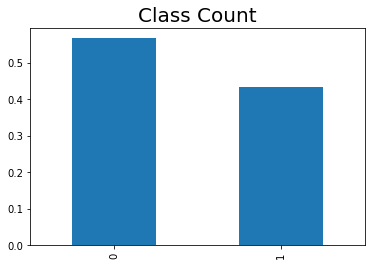

In [8]:
train_df["Class"].value_counts(normalize = True).plot.bar() 

plt.title('Class Count', fontsize = 20)

plt.show()

Figure 1: Class Distribution of the target column in the 2014 Financial indicator training dataset.

A table, such as Table 1, is good to display data, however, it is mostly preferred to use a visual representation. We can see from Figure 1 that there isn't much of a class imbalance. This shows that we can build an ML pipeline without having to deal with a class imbalance.

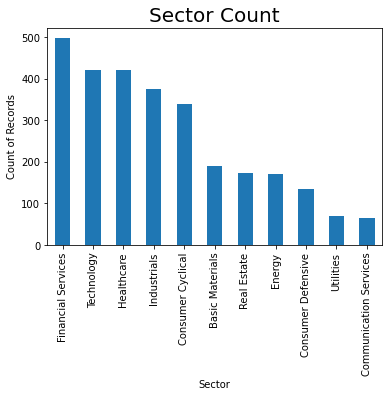

In [9]:
# Sector distribution is important when analysing stocks 


train_df["Sector"].value_counts().plot.bar(orientation=u'vertical')

plt.title('Sector Count', fontsize = 20)
plt.xlabel("Sector")
plt.ylabel("Count of Records")

plt.show()

Figure 2: Distribution of each sector in the 2014 Financial indicator training dataset.

Looking at Figure 2 above, it is observed that there are more companies in financial services, healthcare and technology, when compared to utilities and communication services. This should be kept in mind when developing an ML model to prevent overfitting. 

In [10]:
# Filter out some variables that might be important for this task, to create a correlation matrix.

train_df_corr = train_df.filter(["Revenue Growth", "Operating Income", "Book Value per Share Growth", "Net Income", "Net Profit Margin", 
                            "Total liabilities", "Capital expenditure", "Operating Cash Flow", "priceEarningsRatio", 
                           "grossProfitMargin", "netProfitMargin", "assetTurnover", "cashPerShare", "Net Income per Share",
                           "Book Value per Share", "Shareholders Equity per Share", "PE ratio", "Debt to Assets", "Income Quality",
                           "Capex to Operating Cash Flow", "Invested Capital", "ROE", "Capex per Share"])

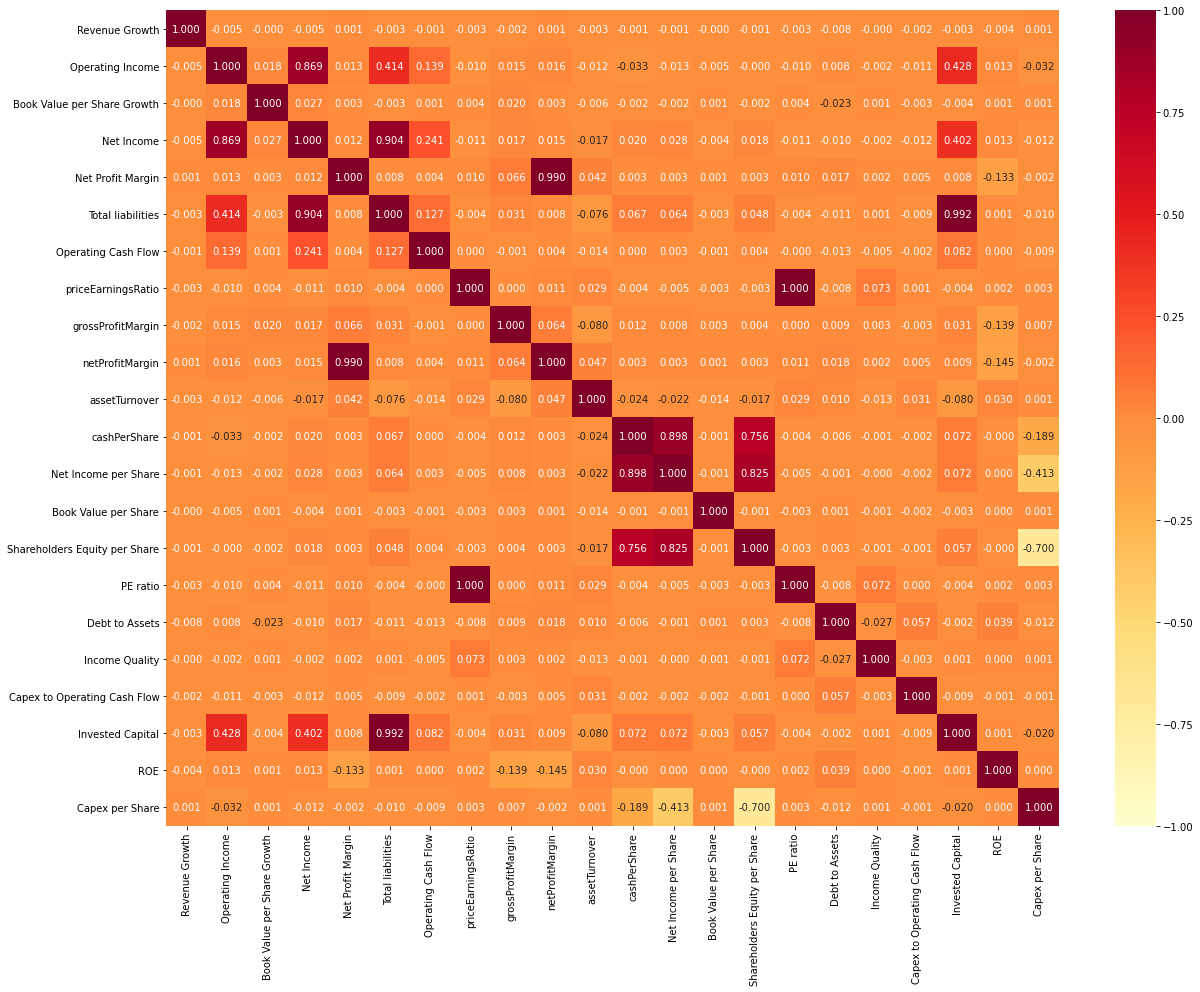

In [13]:
fig, ax = plt.subplots(figsize = (20, 15)) 

sns.heatmap(train_df_corr.corr(), annot = True, cmap = 'YlOrRd', fmt = '.3f', vmin = -1, vmax = 1, center = 0, ax = ax)

plt.show()

Figure 3: Correlation matrix plot of some important variables in the 2014 Financial Indicator dataset.

Looking at this correlation matrix, we can see that most of the features in this dataset are neither highly positively correlated or highly negatively correlated. Also, we cannot exclude the few that are highly positively/negatively correlated because they may be useful predictors in conjuction with the other features. 

## References <a name="References"></a>

de Jonge, E., 2020. CRAN - Package Docopt. [online] Cran.r-project.org. Available at: https://cran.r-project.org/web/packages/docopt/index.html [Accessed 29 November 2020].

Oliphant, T.E., 2006. A guide to NumPy, Trelgol Publishing USA.

McKinney, W. & others, 2010. Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference. pp. 51–56.

Waskom, M. et al., 2017. mwaskom/seaborn: v0.8.1 (September 2017), Zenodo. Available at: https://doi.org/10.5281/zenodo.883859.

Van Rossum, G. & Drake, F.L., 2009. Python 3 Reference Manual, Scotts Valley, CA: CreateSpace.

Hunter, J.D., 2007. Matplotlib: A 2D graphics environment. Computing in science & engineering, 9(3), pp.90–95.

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), pp.2825–2830.

P'erez, Fernando & Granger, B.E., 2007. IPython: a system for interactive scientific computing. Computing in Science & Engineering, 9(3).

Kluyver, T. et al., 2016. Jupyter Notebooks – a publishing format for reproducible computational workflows. In F. Loizides & B. Schmidt, eds. Positioning and Power in Academic Publishing: Players, Agents and Agendas. pp. 87–90.

Anon, 2020. Anaconda Software Distribution, Anaconda Inc. Available at: https://docs.anaconda.com/.